In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split 

In [3]:
mowers = pd.read_csv(r"E:\Adv Analytics\Datasets\RidingMowers.csv")
mowers

,Income,Lot_Size,Response
0,34,26,Not Bought
1,34,40,Not Bought
2,34,46,Not Bought
3,34,48,Not Bought
4,34,53,Not Bought
...,...,...,...
175,86,121,Bought
176,87,109,Bought
177,88,119,Bought
178,89,110,Bought


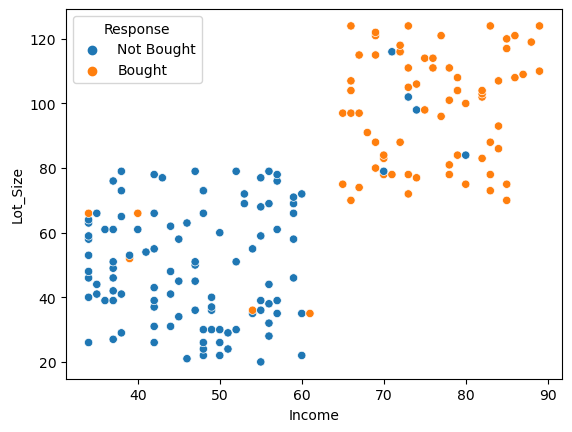

In [4]:
sns.scatterplot(data=mowers,
                x='Income',y='Lot_Size',
                hue='Response')
plt.show()

In [5]:
train, test = train_test_split(mowers, test_size=0.3,
                               random_state=23,
                               stratify=mowers['Response'])

In [7]:
X_train = train.drop('Response', axis=1)
y_train = train['Response']

In [8]:
X_test = test.drop('Response', axis=1)
y_test = test['Response']

In [9]:
dtc= DecisionTreeClassifier(random_state=23,max_depth=3)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=23)

### Drawing a tree

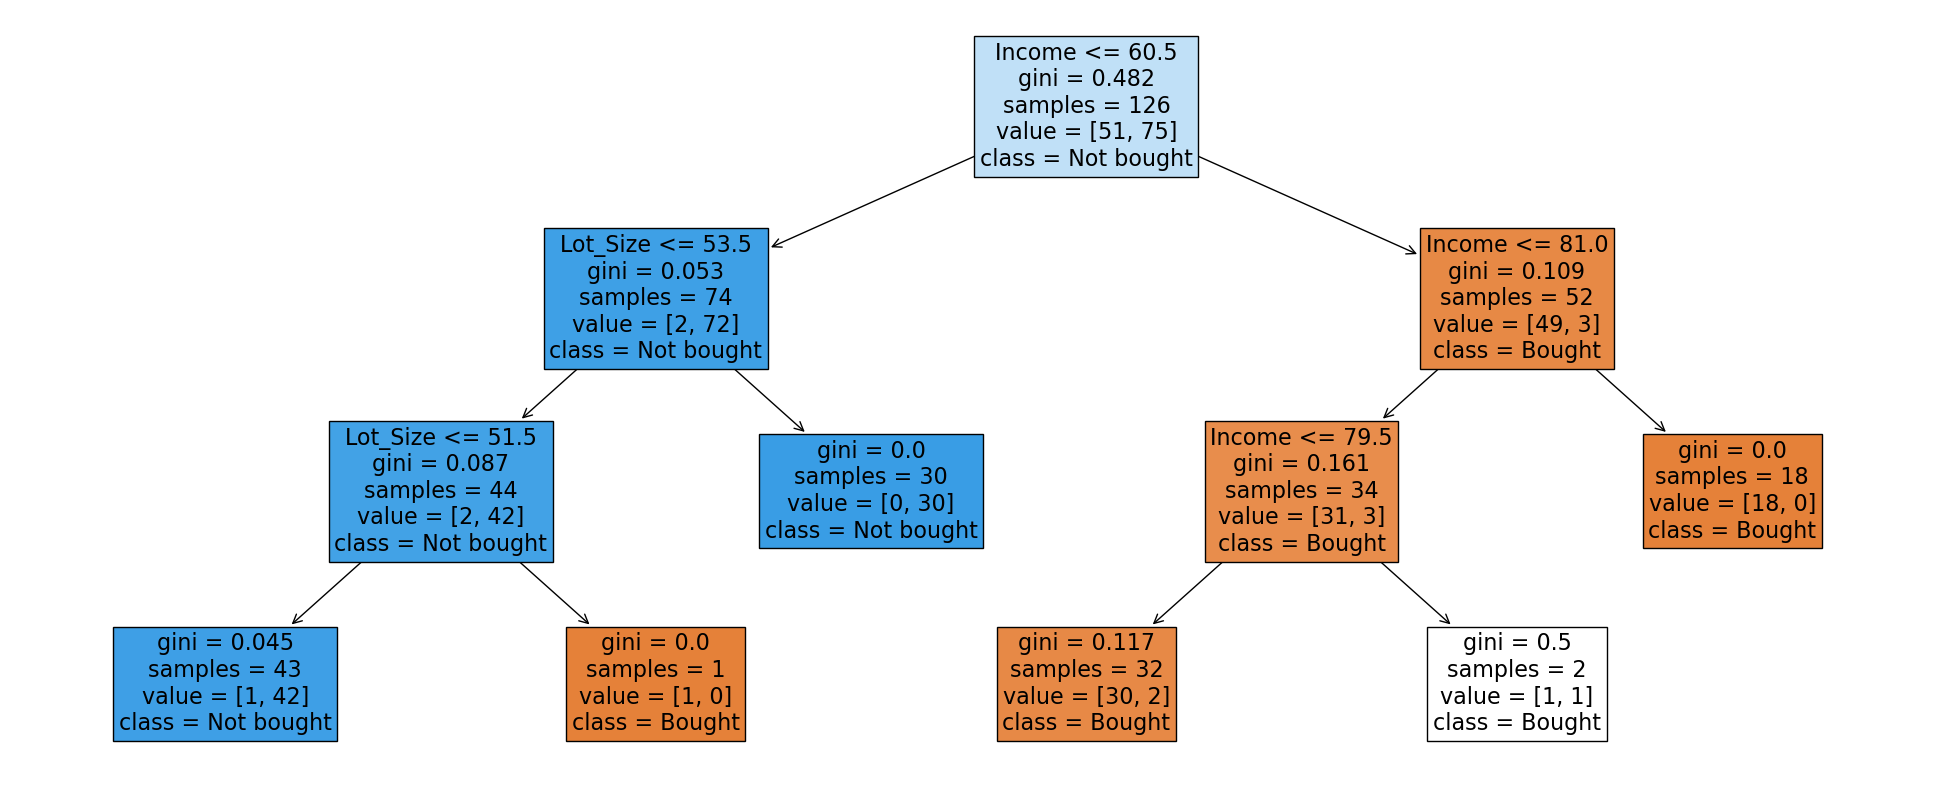

In [11]:
plt.figure(figsize=(25,10))
tree.plot_tree(dtc,feature_names=X_train.columns,filled =True,fontsize=16,
              class_names=['Bought','Not bought'])
plt.show()

### Predicting on test data

In [14]:
X_test = test.drop('Response', axis=1)
y_test = test['Response']
y_pred = dtc.predict(X_test)

### Heat map of Confusion Matrix

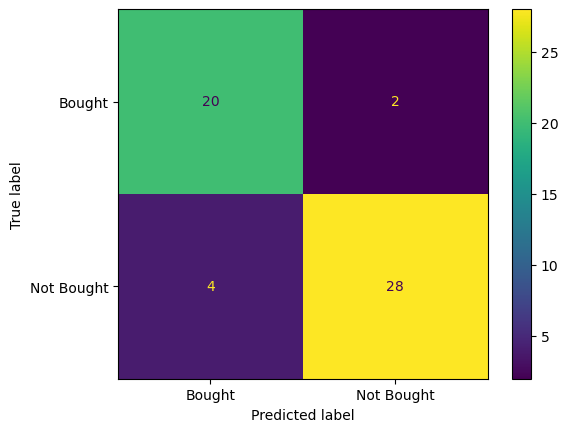

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dtc.classes_)
disp.plot()

plt.show()